# 3D Reference geometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

from mesh_predictor import MeshPredictor

In [2]:
reg = MeshPredictor.from_h5('../../models/reference_3d.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [3]:
geometry_30 = pd.read_csv('../../data/geometry_zt30.csv')[['x', 'y', 'z']].to_numpy()
geometry_50 = pd.read_csv('../../data/geometry_zt50.csv')[['x', 'y', 'z']].to_numpy()
geometry_70 = pd.read_csv('../../data/geometry_zt70.csv')[['x', 'y', 'z']].to_numpy()

In [4]:
# Experiment 883
process_parameters = {
    'Blechdicke': 1.48, 
    'Niederhalterkraft': 470.0, 
    'Ziehspalt': 2.4, 
    'Einlegeposition': 1, 
    'Ziehtiefe': 50,
    'Rp0': 235.160326,
}
geometry = geometry_50

symm = geometry.copy()
symm[:, 0] = - geometry[:, 0]
full = np.concatenate((geometry, symm), axis=0)

In [5]:
df = reg.predict(process_parameters, 
    positions=geometry,
    as_df=True)
df

,x,y,z,deviation,thickness
0,176.248467,7.848119,-48.645467,0.155096,1.450275
1,176.863367,7.600876,-48.322733,0.055574,1.444815
2,175.008567,8.276696,-48.645467,0.183614,1.452761
3,174.371633,8.462206,-48.322733,0.108064,1.450408
4,173.127667,8.920434,-48.645467,0.222481,1.456763
...,...,...,...,...,...
28582,88.794373,-11.390660,0.000000,-0.091772,1.451648
28583,90.416177,-5.989233,0.000000,-0.153685,1.439323
28584,87.985487,0.844680,0.000000,-0.040190,1.469195
28585,88.838437,1.417456,0.000000,-0.134214,1.448986


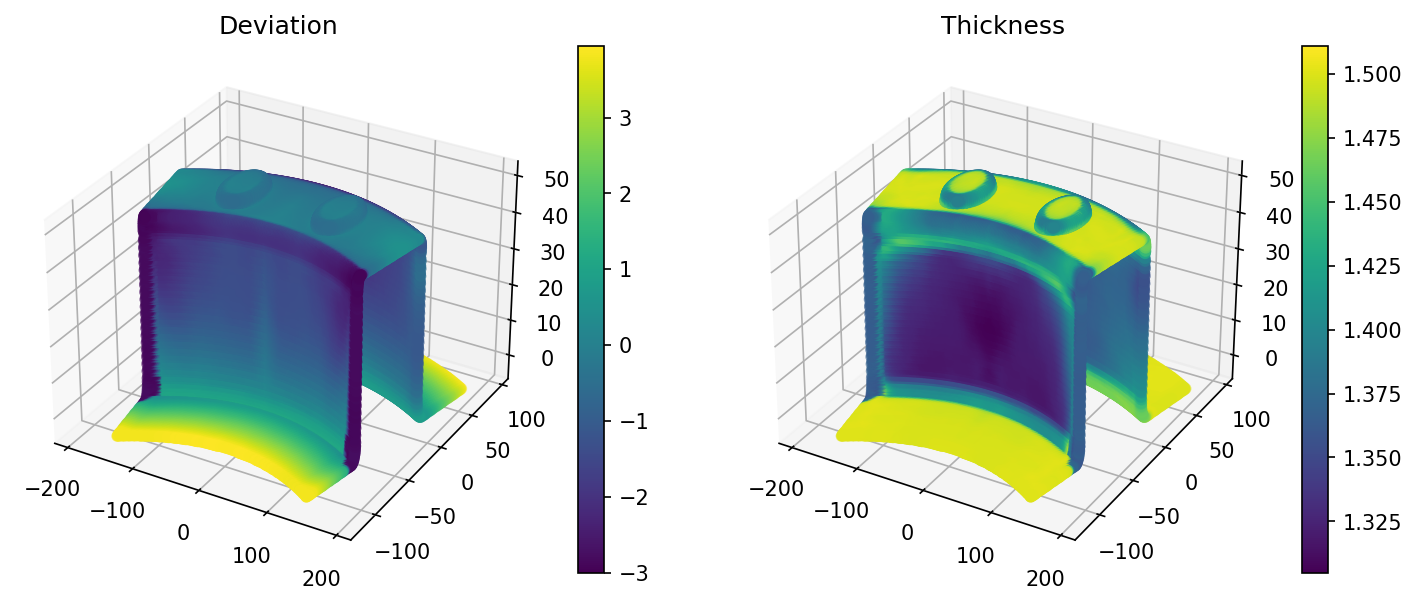

In [6]:
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(121, projection='3d')

deviation = df['deviation'].to_numpy()
deviation = np.concatenate((deviation, deviation), axis=0)

p = ax.scatter(
    full[:, 0], full[:, 1], full[:, 2]+50, 
    c=deviation) 
plt.title("Deviation")
fig.colorbar(p, ax=ax)

ax = fig.add_subplot(122, projection='3d')

thickness = df['thickness'].to_numpy()
thickness = np.concatenate((thickness, thickness), axis=0)

p = ax.scatter(
    full[:, 0], full[:, 1], full[:, 2]+50, 
    c=thickness) 
plt.title("Thickness")
fig.colorbar(p, ax=ax)

plt.tight_layout()